### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

In [2]:
from sklearn.cluster import KMeans

### Load and Explore the Dataset


In [3]:
#Load the Dataset
df = pd.read_csv('Bukas_Raw-jami.csv', index_col='applicant_id')

In [4]:
#View the Dataset
df.head()

,borrower_city_id,borrower_date_of_birth,borrower_province_id,borrower_zip_code,date_needed,datetime_created,datetime_updated,education_course,Course,education_school_id,...,provisional_total_balance,provisional_total_interest_fee,provisional_total_origination_fee,requested_debt_to_burden_ratio,requested_monthly_repayment,requested_principal,requested_total_balance,requested_total_interest_fee,requested_total_origination_fee,status
applicant_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,Tue Dec 31 00:00:00 SGT 2019,2019-05-02T16:27:18.120+07:00,2019-05-08T08:39:56.815+07:00,Senior High School,Senior High School,0,...,0.0,0.0,0.0,1.0,0.0000,0.0,0.0,0.0,0.0,NEW
1,NaN,NaN,NaN,NaN,Tue Dec 31 00:00:00 SGT 2019,2019-07-08T14:28:16.926+07:00,2019-07-08T14:28:16.926+07:00,Senior High School,Senior High School,0,...,0.0,0.0,0.0,1.0,0.0000,0.0,0.0,0.0,0.0,NEW
2,137603.0,Tue Sep 21 00:00:00 SGT 1999,72.0,1781.0,Tue Dec 31 00:00:00 SGT 2019,2019-04-25T05:57:01.359+07:00,2019-05-08T08:39:56.908+07:00,BS Chemical Engineering,Engineering,3,...,0.0,0.0,0.0,1.0,2520.8333,25000.0,30250.0,4500.0,750.0,NEW
3,133901.0,Sat Apr 14 00:00:00 SGT 1984,68.0,1013.0,Tue Dec 31 00:00:00 SGT 2019,2019-04-25T01:19:10.113+07:00,2019-05-08T08:39:56.913+07:00,BS Electrical Engineering,Engineering,3,...,0.0,0.0,0.0,1.0,17343.3333,172000.0,208120.0,30960.0,5160.0,NEW
4,NaN,NaN,NaN,NaN,Tue Dec 31 00:00:00 SGT 2019,2019-05-03T22:28:39.016+07:00,2019-05-08T08:39:56.918+07:00,Senior High School,Senior High School,0,...,0.0,0.0,0.0,1.0,4033.3333,40000.0,48400.0,7200.0,1200.0,NEW


In [5]:
#Describe the data
df.describe(include="all")


,borrower_city_id,borrower_date_of_birth,borrower_province_id,borrower_zip_code,date_needed,datetime_created,datetime_updated,education_course,Course,education_school_id,...,provisional_total_balance,provisional_total_interest_fee,provisional_total_origination_fee,requested_debt_to_burden_ratio,requested_monthly_repayment,requested_principal,requested_total_balance,requested_total_interest_fee,requested_total_origination_fee,status
count,1286.000000,1398,1286.000000,1286.000000,2273,2273,2273,2273,2273,2273.000000,...,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2.273000e+03,2.273000e+03,2.273000e+03,2273.000000,2273
unique,NaN,1087,NaN,NaN,193,2273,2273,139,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,Sun Oct 08 00:00:00 SGT 2000,NaN,NaN,Tue Dec 31 00:00:00 SGT 2019,2019-07-11T02:00:53.392+07:00,2019-07-13T19:35:54.387+07:00,Senior High School,Senior High School,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NEW
freq,NaN,7,NaN,NaN,1008,1,1,1375,1375,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1353
mean,94275.755832,NaN,46.156299,2904.135303,NaN,NaN,NaN,NaN,NaN,1.607567,...,2736.823036,407.130700,67.855117,1.517362,3540.705371,3.511443e+04,4.247717e+04,6.320598e+03,1053.433003,NaN
std,48716.745282,NaN,26.476854,10720.617200,NaN,NaN,NaN,NaN,NaN,2.235866,...,10853.345782,1614.547306,269.091218,22.682863,20583.868581,2.041375e+05,2.465271e+05,3.674476e+04,6124.126190,NaN
min,12810.000000,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN
25%,42111.500000,NaN,18.000000,1229.250000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN
50%,133905.000000,NaN,68.000000,1700.000000,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,1.000000,1512.500000,1.500000e+04,1.815000e+04,2.700000e+03,450.000000,NaN
75%,137477.000000,NaN,70.000000,3300.000000,NaN,NaN,NaN,NaN,NaN,3.000000,...,0.000000,0.000000,0.000000,1.000000,4033.333300,4.000000e+04,4.840000e+04,7.200000e+03,1200.000000,NaN


In [6]:
#convert categorical to number:

map_rel = {"I am the guarantor":0,
"Spouse":1,
"Parent":2,
"Sibling":3,
"Grandparent":4,
"Uncle/Aunt":5,
"Cousin":6,
"Cousin-in-law":7,
"Supervisor":8,
"Other":9,
"undefined":10}

df['guarantor_relationship_to_borrower'] = df['guarantor_relationship_to_borrower'].map(map_rel)

In [7]:
df['guarantor_relationship_to_borrower'].value_counts()

10    1735
2      287
3       68
0       65
5       39
9       32
1       16
6       12
4       12
7        4
8        3
Name: guarantor_relationship_to_borrower, dtype: int64

In [8]:
map_status = {"NEW":0,
"INITIAL_OFFER":1,
"INITIAL_OFFER_ACCEPTED":2,
"ON_HOLD":3,
"REVISIONS_REQUIRED":4,
"REVISIONS_COMPLETED":5,
"CANCELLED":6,
"APPROVED":7,
"REJECTED":8}

df['status'] = df['status'].map(map_status)

In [9]:
df['status'].value_counts()

0    1353
2     471
1     241
7     130
4      50
3      13
8      13
5       1
6       1
Name: status, dtype: int64

In [10]:
df.columns

Index([u'borrower_city_id', u'borrower_date_of_birth', u'borrower_province_id',
       u'borrower_zip_code', u'date_needed', u'datetime_created',
       u'datetime_updated', u'education_course', u'Course',
       u'education_school_id', u'guarantor_city_id',
       u'guarantor_company_address', u'guarantor_company_name',
       u'guarantor_gross_monthly_salary', u'guarantor_has_other_loans',
       u'guarantor_is_renting', u'guarantor_monthly_rent',
       u'guarantor_number_of_dependents', u'guarantor_province_id',
       u'guarantor_relationship_to_borrower', u'guarantor_source_of_funds',
       u'guarantor_tenure', u'guarantor_zip_code',
       u'provisional_debt_to_burden_ratio', u'provisional_monthly_repayment',
       u'provisional_principal', u'provisional_total_balance',
       u'provisional_total_interest_fee', u'provisional_total_origination_fee',
       u'requested_debt_to_burden_ratio', u'requested_monthly_repayment',
       u'requested_principal', u'requested_total_balance

In [11]:
df['Course'].value_counts()

Senior High School          1375
Hospitality                  205
Business and Accountancy     162
Engineering                  150
Communication Arts            79
Liberal Arts and Law          77
Health Sciences               66
IT & Computer Science         65
Others                        62
Education                     32
Name: Course, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 0 to 2272
Data columns (total 36 columns):
borrower_city_id                      1286 non-null float64
borrower_date_of_birth                1398 non-null object
borrower_province_id                  1286 non-null float64
borrower_zip_code                     1286 non-null float64
date_needed                           2273 non-null object
datetime_created                      2273 non-null object
datetime_updated                      2273 non-null object
education_course                      2273 non-null object
Course                                2273 non-null object
education_school_id                   2273 non-null int64
guarantor_city_id                     531 non-null float64
guarantor_company_address             413 non-null object
guarantor_company_name                415 non-null object
guarantor_gross_monthly_salary        2273 non-null float64
guarantor_has_other_loans             2273 non-null int64
guaranto

In [13]:
#for Course
#convert categorical to number:

map_course = {"Senior High School":0,
"Hospitality":1,
"Business and Accountancy":2,
"Engineering":3,
"Communication Arts":4,
"Liberal Arts and Law":5,
"Health Sciences":6,
"IT & Computer Science":7,
"Others":8,
"Other":9,
"Education":10}

df['Course'] = df['Course'].map(map_course)


In [14]:
drop_col = ['borrower_city_id','borrower_date_of_birth','borrower_province_id',
            'borrower_zip_code','date_needed',
           'datetime_created','datetime_updated','education_course',
            'guarantor_city_id','guarantor_company_address',
            'guarantor_gross_monthly_salary','guarantor_has_other_loans',
            'guarantor_monthly_rent','guarantor_company_name',
           'guarantor_number_of_dependents','guarantor_province_id',
            'guarantor_source_of_funds','guarantor_tenure','guarantor_zip_code',
            'provisional_monthly_repayment','provisional_total_balance',
            'provisional_total_interest_fee',
           'provisional_total_origination_fee','requested_debt_to_burden_ratio',
            'requested_monthly_repayment','requested_principal','requested_total_balance',
            'requested_total_interest_fee','requested_total_origination_fee']

df = df.drop(columns=drop_col, axis=0)


In [15]:
df.head()

,Course,education_school_id,guarantor_is_renting,guarantor_relationship_to_borrower,provisional_debt_to_burden_ratio,provisional_principal,status
applicant_id,,,,,,,
0,0,0,0,10,1.0,0,0
1,0,0,0,10,1.0,0,0
2,3,3,0,10,1.0,0,0
3,3,3,0,10,1.0,0,0
4,0,0,0,10,1.0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2273 entries, 0 to 2272
Data columns (total 7 columns):
Course                                2273 non-null int64
education_school_id                   2273 non-null int64
guarantor_is_renting                  2273 non-null int64
guarantor_relationship_to_borrower    2273 non-null int64
provisional_debt_to_burden_ratio      2273 non-null float64
provisional_principal                 2273 non-null int64
status                                2273 non-null int64
dtypes: float64(1), int64(6)
memory usage: 142.1 KB


In [17]:
df.corr()

,Course,education_school_id,guarantor_is_renting,guarantor_relationship_to_borrower,provisional_debt_to_burden_ratio,provisional_principal,status
Course,1.000000,0.586678,0.175867,-0.421827,-0.314014,0.177861,0.418186
education_school_id,0.586678,1.000000,0.229022,-0.522896,-0.378925,0.245420,0.547064
guarantor_is_renting,0.175867,0.229022,1.000000,-0.401576,-0.151845,0.241690,0.331944
guarantor_relationship_to_borrower,-0.421827,-0.522896,-0.401576,1.000000,0.648118,-0.422898,-0.713025
provisional_debt_to_burden_ratio,-0.314014,-0.378925,-0.151845,0.648118,1.000000,-0.383343,-0.592153
provisional_principal,0.177861,0.245420,0.241690,-0.422898,-0.383343,1.000000,0.752793
status,0.418186,0.547064,0.331944,-0.713025,-0.592153,0.752793,1.000000


In [18]:
#Set range for k
range_n_clusters= [2,3,4,5,6,7,8,9,10]

#Set an empty list to store the SSE values for each cluster
scores = []

# Iterate over cluster size options
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=1) 
    kmeans.fit(df)
    score = kmeans.inertia_
    scores.append(score)
    print(str(i) +"\t" +str(score))

2	19993637503.239334
3	6555947241.374447
4	3928857579.164245
5	2091375682.1458044
6	1443112130.5026288
7	942916321.8082623
8	701325985.89803
9	531737043.83469164
10	387400019.70088106


Text(0,0.5,'Score')

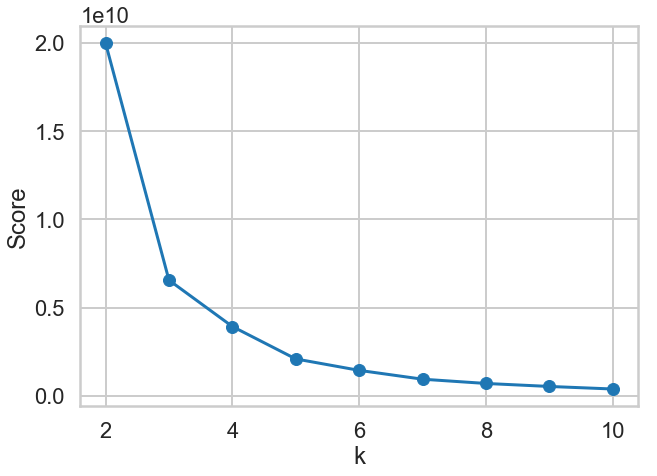

In [19]:
#Plot the results
plt.figure(figsize=(10,7))
plt.plot(range_n_clusters, np.abs(scores), marker='o')
plt.xlabel("k")
plt.ylabel("Score")

In [20]:
#Instantiate the Algorithm
kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=1)

#Fit to the data
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [21]:
#Output of K-Means is the cluster label
k3_labels = kmeans.labels_

#Attach labels to the original DataFrame
df_k3 = df.copy()
df_k3['Label'] = k3_labels

In [22]:
#Check the size of each cluster
df_k3.Label.value_counts()

0    2127
1      85
2      61
Name: Label, dtype: int64

In [23]:
df_k3.head(1000)

,Course,education_school_id,guarantor_is_renting,guarantor_relationship_to_borrower,provisional_debt_to_burden_ratio,provisional_principal,status,Label
applicant_id,,,,,,,,
0,0,0,0,10,1.0,0,0,0
1,0,0,0,10,1.0,0,0,0
2,3,3,0,10,1.0,0,0,0
3,3,3,0,10,1.0,0,0,0
4,0,0,0,10,1.0,0,0,0
5,3,3,0,10,1.0,0,0,0
6,0,0,0,10,1.0,0,0,0
7,0,0,0,10,1.0,0,2,0
8,0,0,0,10,1.0,0,0,0


(0, 1.2)

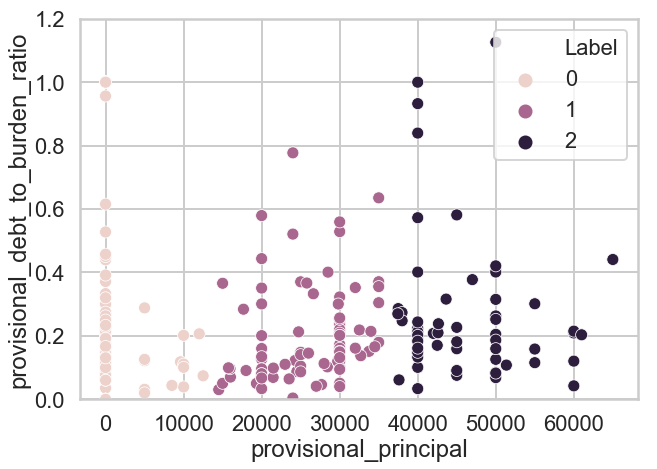

In [25]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.provisional_principal, y=df_k3.provisional_debt_to_burden_ratio, hue=df_k3.Label)
plt.ylim(0,1.2)


(0, 20)

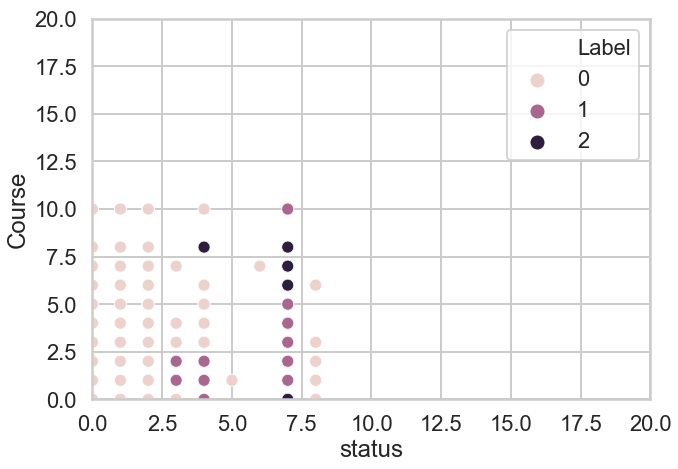

In [37]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.status, y=df_k3.Course, hue=df_k3.Label)
plt.ylim(0,20)
plt.xlim(0,20)

(0, 200000)

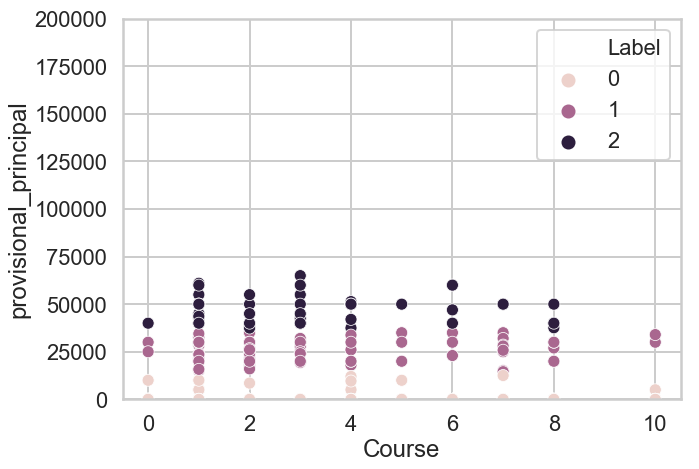

In [52]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.Course, y=df_k3.provisional_principal, hue=df_k3.Label)
plt.ylim(0,200000)

(0, 200000)

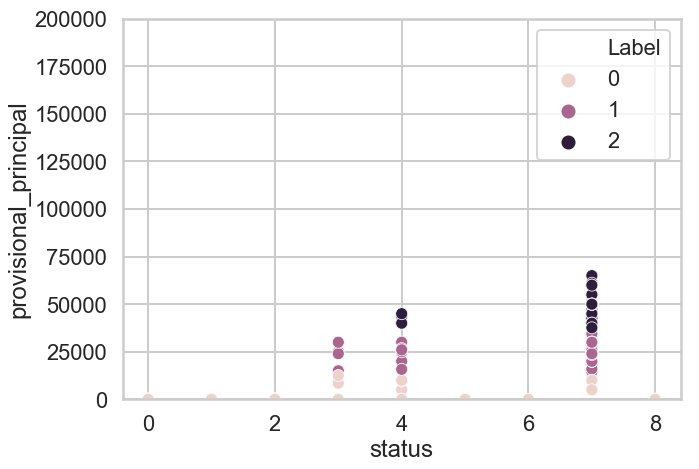

In [49]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k3.status, y=df_k3.provisional_principal, hue=df_k3.Label)
plt.ylim(0,200000)